In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

In [181]:
sample_data = pd.read_csv('sample_census2_100.csv')
sample_data.head()

,Unnamed: 0,Id,zip_code,total,non_hispanic_tot,Not Hispanic or Latino householder: - Householder who is White alone,Not Hispanic or Latino householder: - Householder who is Black or African American alone,Not Hispanic or Latino householder: - Householder who is American Indian and Alaska Native alone,Not Hispanic or Latino householder: - Householder who is Asian alone,Not Hispanic or Latino householder: - Householder who is Native Hawaiian and Other Pacific Islander alone,...,Geography_zip,per_capita_income_2017_estimate,per_capita_income_2017_margin,white_tot,black_tot,indian_tot,asian_tot,native_tot,other_tot,mixed_tot
0,0,8600000US01850,1850,5680,5056,4484,204,5,248,0,...,ZCTA5 01850,19486.0,1964.0,5680,4737,221,8,249,0,312
1,1,8600000US99502,99502,6576,6358,5192,226,301,403,24,...,ZCTA5 99502,41256.0,2823.0,6576,5292,231,313,407,26,81
2,2,8600000US33126,33126,15244,946,699,94,8,101,4,...,ZCTA5 33126,17570.0,970.0,15244,13432,322,23,105,6,810
3,3,8600000US10035,10035,11169,5865,483,5033,23,88,1,...,ZCTA5 10035,21618.0,1727.0,11169,2426,5594,83,93,8,2402
4,4,8600000US10029,10029,27465,12873,2688,8557,63,945,2,...,ZCTA5 10029,27966.0,1641.0,27465,8159,9960,225,977,18,6592


In [182]:
from config import api_key
base_url = 'https://api.yelp.com/v3/businesses/search?'
head = {'Authorization': 'Bearer '+ api_key}
params = {
    'categories': 'mexican',
    'location': 92660,
    'limit': 50,
    'radius': 3000
    #max limit is 50
    
         }
print(params)
response = requests.get(base_url, params, headers=head)
#response = requests.request('GET', base_url, headers=head, params=params)

{'categories': 'mexican', 'location': 92660, 'limit': 50, 'radius': 3000}


In [183]:
sample_data['num_mex_rest'] = 0

In [184]:
sample_data['zip_code'] = sample_data['zip_code'].astype('str')
fun = lambda x : '0'+ str(x) if len(x) == 4 else ('00'+ str(x) if len(x) == 3 else str(x))
sample_data['zip_code'] = sample_data['zip_code'].apply(fun)

In [195]:
i= 0 
for index, row in sample_data.iterrows():
    while i < 100:
        try:
            i += 1
            #print(str(row['zip_code']))
            params['location'] = row['zip_code']
            response = requests.get(base_url, params, headers=head)
            sample_data.loc[index,'num_mex_rest'] = response.json()['total']
            #print(len(response.json()['businesses']))
            print(i)
        except:
            pass
        break

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [185]:
sample_data.head(10)

,Unnamed: 0,Id,zip_code,total,non_hispanic_tot,Not Hispanic or Latino householder: - Householder who is White alone,Not Hispanic or Latino householder: - Householder who is Black or African American alone,Not Hispanic or Latino householder: - Householder who is American Indian and Alaska Native alone,Not Hispanic or Latino householder: - Householder who is Asian alone,Not Hispanic or Latino householder: - Householder who is Native Hawaiian and Other Pacific Islander alone,...,per_capita_income_2017_estimate,per_capita_income_2017_margin,white_tot,black_tot,indian_tot,asian_tot,native_tot,other_tot,mixed_tot,num_mex_rest
0,0,8600000US01850,01850,5680,5056,4484,204,5,248,0,...,19486.0,1964.0,5680,4737,221,8,249,0,312,0
1,1,8600000US99502,99502,6576,6358,5192,226,301,403,24,...,41256.0,2823.0,6576,5292,231,313,407,26,81,0
2,2,8600000US33126,33126,15244,946,699,94,8,101,4,...,17570.0,970.0,15244,13432,322,23,105,6,810,0
3,3,8600000US10035,10035,11169,5865,483,5033,23,88,1,...,21618.0,1727.0,11169,2426,5594,83,93,8,2402,0
4,4,8600000US10029,10029,27465,12873,2688,8557,63,945,2,...,27966.0,1641.0,27465,8159,9960,225,977,18,6592,0
5,5,8600000US30824,30824,6368,6326,3803,2468,7,18,1,...,20689.0,1287.0,6368,3818,2479,9,18,1,9,0
6,6,8600000US37922,37922,16477,16325,15469,379,28,347,3,...,52833.0,2705.0,16477,15583,381,28,349,3,49,0
7,7,8600000US06037,06037,6292,6229,6118,22,4,60,0,...,45859.0,3246.0,6292,6175,22,4,60,0,4,0
8,8,8600000US90064,90064,10852,9661,7610,296,17,1450,5,...,61983.0,4008.0,10852,8259,304,27,1456,5,458,0
9,9,8600000US02724,02724,7667,7501,7101,114,10,69,0,...,23497.0,1886.0,7667,7193,123,13,69,0,66,0


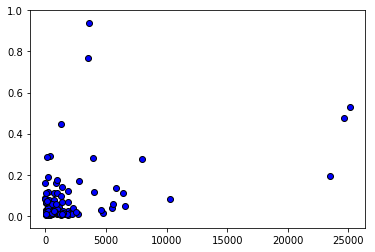

In [196]:
#Scatter plot of income estimate vs zipcode)
#plt.scatter(sample_data["Geography_zip"],sample_data["per_capita_income_2017_estimate"],marker="o", facecolors="blue", edgecolors="black")

#plt.scatter(sample_data["Geography_zip"],sample_data["white_tot"],marker="o", facecolors="red", edgecolors="black")

#plt.scatter(sample_data["Geography_zip"],sample_data["black_tot"],marker="o", facecolors="gold", edgecolors="black")

#plt.scatter(sample_data["Geography_zip"],sample_data["indian_tot"],marker="o", facecolors="LightSkyBlue", edgecolors="black")

#plt.scatter(sample_data["Geography_zip"],sample_data["asian_tot"],marker="o", facecolors="LightCoral", edgecolors="black")

plt.scatter(sample_data["num_mex_rest"],(sample_data["hispanic_tot"]/sample_data["total"]),marker="o", facecolors="blue", edgecolors="black")

#plt.ylabel("2017 Income Est")

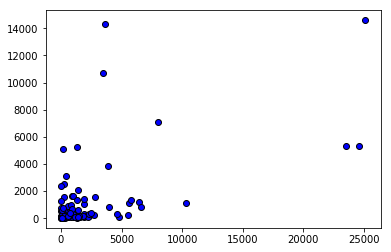

In [197]:
plt.scatter(sample_data["num_mex_rest"],(sample_data["hispanic_tot"]),marker="o", facecolors="blue", edgecolors="black")

In [193]:
sample_data.to_csv('Test 2 Mexican Restaurants.csv')

In [194]:
response.json()['total']

10100